# China Experiment

This is an attempt to replicate the China forecast from Predicting Politics

In [1]:
import copy
from collections import defaultdict, namedtuple
from itertools import combinations
import csv

import numpy as np
import scipy.stats

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('bmh')

In [2]:
from negotiation_model import *
from bdm_agent import *
from bdm_replication import *

## Load data

In [3]:
data = pd.read_csv("/Users/dmasad/Programming/Learning/BDM/ChinaData.csv")

In [4]:
# Normalize
#data.Resources /= data.Resources.sum()
data.Resources /= 100
data.Position = ((data.Position - data.Position.min()) 
                 / (data.Position.max() - data.Position.min()))
data.Salience /= 100

In [5]:
data.sort("Stakeholder")

,Stakeholder,Resources,Position,Salience
9,Baibing,0.85,0.055556,0.85
14,Boyibo,0.75,0.111111,0.70
16,Challdem,0.20,1.000000,0.90
13,Cheyun,1.00,0.000000,0.85
17,Chspring,0.20,1.000000,0.90
21,Europe,0.55,0.888889,0.30
23,Guandung,0.30,0.444444,0.70
22,Hong Kong,0.25,1.000000,0.85
20,Japan,0.50,0.555556,0.50
1,Lipeng,0.90,0.055556,0.80


In [6]:
stakeholders = data.sort("Stakeholder").Stakeholder

## Start and run model

In [ ]:
agents = []
for i, row in data.iterrows():
    agent = BDMActor(row.Stakeholder, row.Resources, row.Position, row.Salience)
    agent.decision_model.Q = 1
    agent.decision_model.T = 1
    agent.decision_model.verbose = False
    agents.append(agent)
    
model = Real_Negotiation_Model(agents)

In [ ]:
model.find_median()

In [ ]:
for agent in model.agents:
    print(agent)

In [ ]:
model.step()

In [ ]:
for agent in stakeholders:
    print(model.agent_names[agent])

In [ ]:
model.find_median()

# Multiple iterations

Run the model for one step many times, get resulting distribution.

In [7]:
params = {
    "font.family": 'serif',
    "font.serif": ["Computer Modern"],
    'text.usetex': True,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 14

   }
plt.rcParams.update(params)

In [8]:
agents = []
for i, row in data.iterrows():
    agent = BDMActor(row.Stakeholder, row.Resources, row.Position, row.Salience)
    agent.decision_model.Q = 0.5
    agent.decision_model.T = 0.5
    agent.decision_model.verbose = False
    agents.append(agent)
    
base_model = Real_Negotiation_Model(agents)

In [10]:
model_copies = []
for _ in range(100):
    model = copy.deepcopy(base_model)
    for agent in model.agents:
        if random.random() < 0.2:
            agent.salience = random.random()
    model.step()
    model_copies.append(model)

In [11]:
medians = [m.find_median() for m in model_copies]
means = [m.find_mean() for m in model_copies]

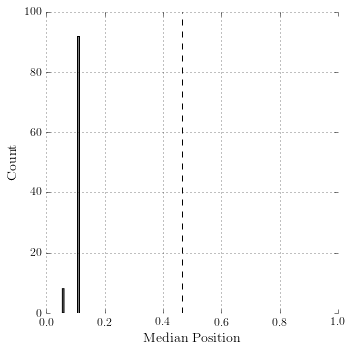

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(medians, color='grey')
ax.grid(True)
ax.set_xlim(0, 1)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.vlines((52-10)/(100-10), 0, 100, linestyle='--')
ax.set_xlabel("Median Position")
ax.set_ylabel("Count")
fig.tight_layout()

PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/BDM_Reproduction/Figures/"
fig.savefig(PATH + "New_ChinaModel.pdf")

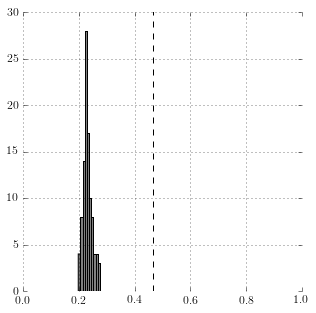

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(means, color='grey')
ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim(0, 30)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.vlines((52-10)/(100-10), 0, 100, linestyle='--')

## From Scholz Model

In [17]:
scholz_medians = [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 15.0, 20.0, 20.0, 
                  20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 
                  20.0, 15.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 15.0, 
                  20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 
                  20.0, 15.0, 20.0]

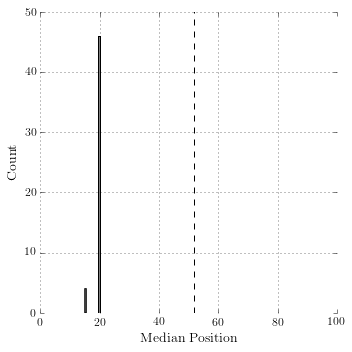

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(scholz_medians, color='grey')
ax.grid(True)
ax.set_xlim(0, 100)
ax.set_ylim(0, 50)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.vlines(52, 0, 100, linestyle='--')
ax.set_xlabel("Median Position")
ax.set_ylabel("Count")
fig.tight_layout()
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/BDM_Reproduction/Figures/"
fig.savefig(PATH + "Scholz_ChinaModel.pdf")